# Task 1

In [82]:
N = 64
box_size = 16.
dt = .01
eps = 1.
sigma = 1.

In [83]:
# For numerical differentiation.
dx = box_size / 10000
dy = box_size / 10000
dz = box_size / 10000

In [84]:
import numpy as np

In [85]:
N_1d = round(N**(1 / 3))
cell_size = box_size / N_1d
x = np.linspace(cell_size / 2, box_size - cell_size / 2, num=N_1d)
y = np.linspace(cell_size / 2, box_size - cell_size / 2, num=N_1d)
z = np.linspace(cell_size / 2, box_size - cell_size / 2, num=N_1d)

X, Y, Z = np.meshgrid(x, y, z)

x = X.reshape((N, 1))
y = Y.reshape((N, 1))
z = Z.reshape((N, 1))

In [86]:
vlims = [-10, 10]

vx = (vlims[1] - vlims[0]) * np.random.random_sample(size=N) + vlims[0]
vy = (vlims[1] - vlims[0]) * np.random.random_sample(size=N) + vlims[0]
vz = (vlims[1] - vlims[0]) * np.random.random_sample(size=N) + vlims[0]

vx = vx.reshape((N, 1))
vy = vy.reshape((N, 1))
vz = vz.reshape((N, 1))

vx_center = vx.mean()
vy_center = vy.mean()
vz_center = vz.mean()
# v_center = np.sqrt(vx_center**2 + vy_center**2 + vz_center**2)

v0 = np.sqrt((vx - vx_center)**2 + (vy - vy_center)**2 + (vz - vz_center)**2)

In [87]:
def U(r):
    sigma_over_r6 = (sigma / r)**6
    return 4 * eps * sigma_over_r6 * (sigma_over_r6 - 1)

In [88]:
def shortest(r1, r2):
    dr = np.abs(r1 - r2)
    return np.linalg.norm(np.array([
        min(dr[0], box_size - dr[0]),
        min(dr[1], box_size - dr[1]),
        min(dr[2], box_size - dr[2]),
    ]))

In [89]:
def energy(x, y, z, vx, vy, vz):
    # Kinetic energy.
    E = (vx**2 + vy**2 + vz**2).sum() / 2
    
    # Potential energy.
    for i in range(N):
        ri = np.array([x[i], y[i], z[i]])
        for j in range(i + 1, N):
            rj = np.array([x[j], y[j], z[j]])
            E += U(shortest(ri, rj))
    
    return E

In [90]:
# Force from j-th particle to i-th particle.
def f(ri, rj):
#     U0 = U(np.linalg.norm(ri - rj))
    U0 = U(shortest(ri, rj))
    
    rix = ri; rix[0] += dx
    Ux = U(shortest(rix, rj))
    fx = -(Ux - U0) / dx
    
    riy = ri; riy[1] += dy
    Uy = U(shortest(riy, rj))
    fy = -(Uy - U0) / dy
    
    riz = ri; riz[2] += dz
    Uz = U(shortest(riz, rj))
    fz = -(Uz - U0) / dz
    
    return np.array([fx, fy, fz])

In [91]:
def get_a(x, y, z):
    ax = np.zeros((N, 1))
    ay = np.zeros((N, 1))
    az = np.zeros((N, 1))
    fxmat = np.zeros((N, N))
    fymat = np.zeros((N, N))
    fzmat = np.zeros((N, N))
    
    for i in range(N):
        ri = np.array([x[i], y[i], z[i]])
        
        for j in range(i):
            # Copy previously counted values according to the III Newton's law.
            ax[i] -= fxmat[j, i]
            ay[i] -= fymat[j, i]
            az[i] -= fzmat[j, i]
        
        for j in range(i + 1, N):
            rj = np.array([x[j], y[j], z[j]])
            f_ij = f(ri, rj)
            fxmat[i, j] = f_ij[0]
            fymat[i, j] = f_ij[1]
            fzmat[i, j] = f_ij[2]
            
            ax[i] += fxmat[i, j]
            ay[i] += fymat[i, j]
            az[i] += fzmat[i, j]
    return ax, ay, az

In [92]:
def Kv(vx, vy, vz):
    v = np.sqrt(vx**2 + vy**2 + vz**2)
    return np.mean(v0 * v) / np.mean(v0 * v0)

In [93]:
ax, ay, az = get_a(x, y, z)

In [94]:
E_history = [energy(x, y, z, vx, vy, vz)]
Kv_history = [Kv(vx - vx_center, vy - vy_center, vz - vz_center)]

In [95]:
for iter_count in range(50):
    x += vx * dt + ax * dt**2 / 2
    y += vy * dt + ay * dt**2 / 2
    z += vz * dt + az * dt**2 / 2
    
    x[x > box_size] -= box_size
    x[x < box_size] += box_size
    y[y > box_size] -= box_size
    y[y < box_size] += box_size
    z[z > box_size] -= box_size
    z[z < box_size] += box_size
    
    ax_new, ay_new, az_new = get_a(x, y, z)
    
    vx += (ax_new + ax) * dt / 2
    vy += (ay_new + ay) * dt / 2
    vz += (az_new + az) * dt / 2
    
    ax = ax_new.copy()
    ay = ay_new.copy()
    az = az_new.copy()
    
    E_history.append(energy(x, y, z, vx, vy, vz))
    Kv_history.append(Kv(vx - vx_center, vy - vy_center, vz - vz_center))

In [96]:
import matplotlib.pyplot as plt

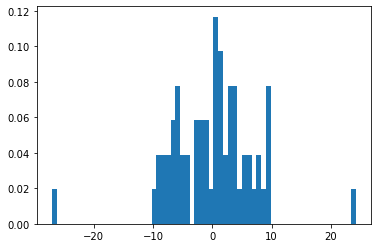

In [97]:
# The histogram of the velocities distribution.
n, bins, patches = plt.hist(vx - vx_center, bins=64, density=True)

#plt.xlim(vlims);
# Add a line showing the expected Maxwell's distribution.
#maxwell_distr = np.exp(-bins**2 / 2)
#plt.plot(bins, maxwell_distr, 'k--', linewidth=1.5);

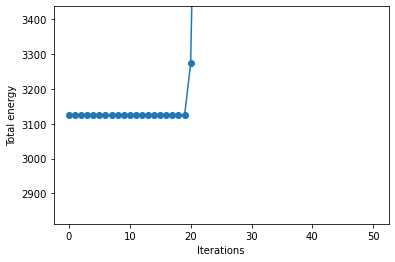

In [98]:
plt.plot(E_history, 'o-')
plt.ylim(.9 * E_history[0], 1.1 * E_history[0])
plt.xlabel('Iterations')
plt.ylabel('Total energy');

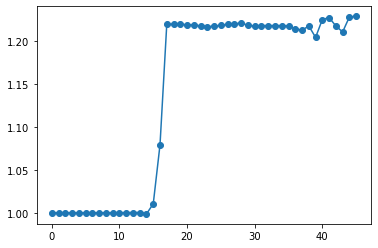

In [99]:
plt.plot(Kv_history[5:], 'o-');

# Task 2

## Subtask a

Assuming that $\langle \vec{V}(0) \cdot \vec{F}(t) \rangle = 0$, we multiply the equation by $\vec{V}(0)$ and average:

$$M \frac{d}{dt} \langle \vec{V}(0) \vec{V}(t) \rangle = -\gamma \langle \vec{V}(0) \vec{V}(t) \rangle$$

$$\langle \vec{V}(0) \vec{V}(t) \rangle = \langle \vec{V}(0)^2 \rangle e^{-\frac{\gamma}{m} t}$$

$$K_V(t) = \frac{\langle \vec{V}(0) \vec{V}(t) \rangle}{\langle \vec{V}(0)^2 \rangle} = e^{-\frac{\gamma}{m} t}$$

## Subtask b

In [ ]:
import numpy as np

In [38]:
U1 = np.random.random_sample(size=10000)  # [0, 1)
U2 = np.random.random_sample(size=10000)  # [0, 1)
Y = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)

In [39]:
import matplotlib.pyplot as plt

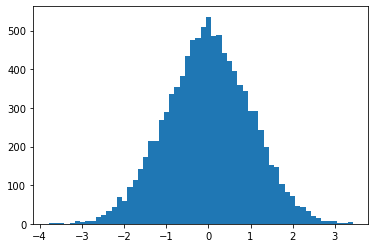

In [40]:
plt.hist(Y, bins='auto');

## Subtask c

In [41]:
def generate(n):
    U1 = np.random.random_sample(size=n)  # [0, 1)
    U2 = np.random.random_sample(size=n)  # [0, 1)
    return np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)

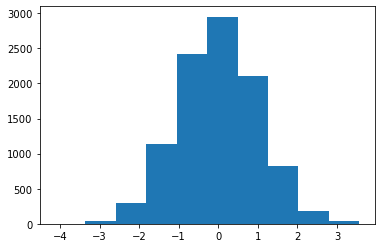

In [42]:
plt.hist(generate(10000));

In [43]:
gamma = 1.
M = 1.
kbT = 1.
Gamma = 2 * kbT * gamma
dt = .01

In [104]:
n = 10000  # time steps
N = 1000  # experiments

ksi = np.random.normal(size=(N, n))
v0 = np.random.rand(n)
v = np.zeros((N, n))
v[0] = v0
Kv = np.zeros(N)
for j in range(1, N):
    for i in range(n):
        v[j, i] = v[j - 1, i] * (1 - dt) + (2 * dt)**.5 * ksi[j - 1, i]

Kv = np.mean(v0 * v, axis=1) / np.mean(v0**2)

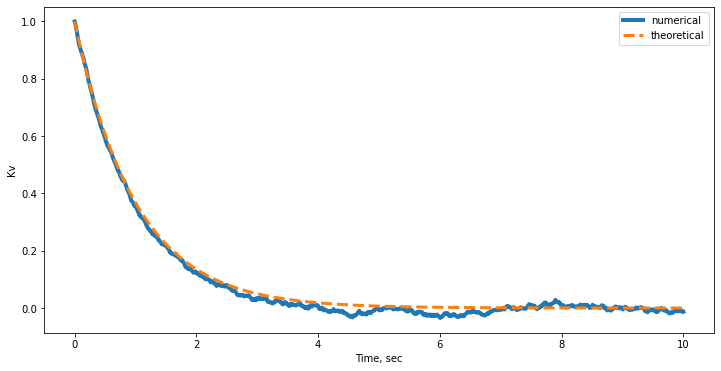

In [105]:
fig = plt.figure(figsize=(12, 6))

plt.plot(np.linspace(0, N * dt, N), Kv, label='numerical', lw=4)
plt.plot(np.linspace(0, N * dt, N), np.exp(-np.linspace(0, N * dt, N)), '--', label='theoretical', lw=3)
plt.xlabel('Time, sec')
plt.ylabel('Kv')
plt.legend()

plt.show();